<a href="https://colab.research.google.com/github/shreshthajit/ML_Lab/blob/main/AI_ML_Final_Assignment/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!unzip '/content/gdrive/MyDrive/MedicalData/CNN_dataset.zip'

Streaming output truncated to the last 5000 lines.
  inflating: CNN_dataset/CXR/005988.jpeg  
  inflating: CNN_dataset/CXR/000636.jpeg  
  inflating: CNN_dataset/CXR/008656.jpeg  
  inflating: CNN_dataset/CXR/003299.jpeg  
  inflating: CNN_dataset/CXR/000724.jpeg  
  inflating: CNN_dataset/CXR/003108.jpeg  
  inflating: CNN_dataset/CXR/004788.jpeg  
  inflating: CNN_dataset/CXR/000661.jpeg  
  inflating: CNN_dataset/CXR/001709.jpeg  
  inflating: CNN_dataset/CXR/008482.jpeg  
  inflating: CNN_dataset/CXR/008197.jpeg  
  inflating: CNN_dataset/CXR/002963.jpeg  
  inflating: CNN_dataset/CXR/004771.jpeg  
  inflating: CNN_dataset/CXR/000698.jpeg  
  inflating: CNN_dataset/CXR/001965.jpeg  
  inflating: CNN_dataset/CXR/001066.jpeg  
  inflating: CNN_dataset/CXR/002563.jpeg  
  inflating: CNN_dataset/CXR/007761.jpeg  
  inflating: CNN_dataset/CXR/008882.jpeg  
  inflating: CNN_dataset/CXR/006936.jpeg  
  inflating: CNN_dataset/CXR/005619.jpeg  
  inflating: CNN_dataset/CXR/002758.jpeg  
  i

In [34]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split

In [35]:
dir_path = '/content/CNN_dataset/'

train_split = 0.75
val_split = 0.1
test_split = 0.15

images = []
labels = []

class_names = ['AbdomenCT', 'CXR', 'ChestCT', 'Hand', 'HeadCT']

In [36]:

for i, class_name in enumerate(class_names):
  class_path = os.path.join(dir_path, class_name)
  for img_name in os.listdir(class_path):
      img_path = os.path.join(class_path, img_name)
      img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
      img = cv2.resize(img, (64, 64))
      images.append(img)
      labels.append(i)

In [37]:
images = np.array(images, dtype=np.float32)
images = np.expand_dims(images, axis=-1)
labels = np.array(labels, dtype=np.int32)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(
    images, labels, test_size=test_split, stratify=labels, random_state=42)

x_train, x_val, y_train, y_val = train_test_split(
    x_train, y_train, test_size=val_split/(train_split-val_split),
    stratify=y_train, random_state=42)

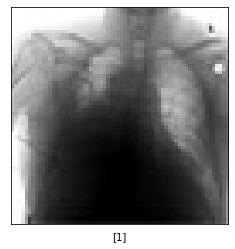

In [8]:
import matplotlib.pyplot as plt

plt.xticks([])
plt.yticks([])
plt.xlabel([y_train[4]])
plt.imshow(x_train[4],cmap=plt.cm.binary)

### Scaling

In [9]:
x_train /= 255.
x_val /= 255.
x_test /= 255.

In [67]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, AvgPool2D
from tensorflow.keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import keras

In [74]:
model = keras.Model(inputs=inp, outputs=out)

### MODEL

In [75]:
import tensorflow as tf
model = tf.keras.Sequential()

model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu', input_shape=(64,64,1))) 
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=32, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))


model.add(Conv2D(filters=64, kernel_size=(2,2),strides=(1, 1), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())


model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(5, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 64, 64, 64)        320       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                            
                                                                 
 dropout_22 (Dropout)        (None, 32, 32, 64)        0         
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        8224      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_23 (Dropout)        (None, 16, 16, 32)       

In [76]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Reshaping Data

In [77]:
x_train = x_train.reshape(-1,64, 64,1) 
x_test = x_test.reshape(-1,64, 64, 1)
x_train.shape

(35961, 64, 64, 1)

In [79]:
log=model.fit(np.array(x_train), 
                         y_train, 
                         batch_size = 64, 
                         verbose = 1, 
                         epochs = 10, 
                         validation_split = 0.1,
                         shuffle = False)

Epoch 1/10
506/506 [==============================] - 7s 14ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.0189 - val_accuracy: 0.9972
Epoch 2/10
506/506 [==============================] - 7s 14ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.0144 - val_accuracy: 0.9967
Epoch 3/10
506/506 [==============================] - 7s 14ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 0.0034 - val_accuracy: 0.9989
Epoch 4/10
506/506 [==============================] - 7s 14ms/step - loss: 0.0039 - accuracy: 0.9988 - val_loss: 0.0067 - val_accuracy: 0.9981
Epoch 5/10
506/506 [==============================] - 7s 14ms/step - loss: 0.0024 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9992
Epoch 6/10
506/506 [==============================] - 7s 13ms/step - loss: 0.0036 - accuracy: 0.9989 - val_loss: 0.0017 - val_accuracy: 0.9992
Epoch 7/10
506/506 [==============================] - 7s 14ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.0018 - val_accuracy: 0.9992

In [80]:
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1]*100)


 Test accuracy: 99.90666508674622


In [81]:
predictions = model.predict(x_test)
predictions[0]

235/235 [==============================] - 1s 2ms/step


array([1.7063319e-18, 1.0000000e+00, 4.8612519e-13, 2.2255036e-09,
       3.8272468e-19], dtype=float32)

In [82]:
x_test = x_test.reshape(-1, 64, 64)
x_test.shape

(7500, 64, 64)

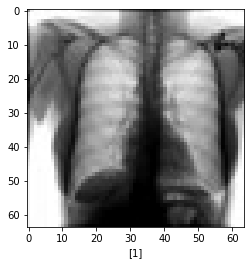

In [83]:
plt.xlabel([y_test[0]])
plt.imshow(x_test[0],cmap=plt.cm.binary)
     

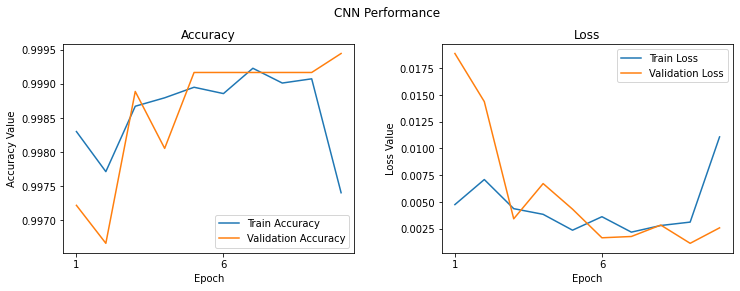

In [89]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('CNN Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

max_epoch = len(log.history['accuracy'])+1
epoch_list = list(range(1,max_epoch))
ax1.plot(epoch_list, log.history['accuracy'], label='Train Accuracy')
ax1.plot(epoch_list, log.history['val_accuracy'], label='Validation Accuracy')
ax1.set_xticks(np.arange(1, max_epoch, 5))
ax1.set_ylabel('Accuracy Value')
ax1.set_xlabel('Epoch')
ax1.set_title('Accuracy')
l1 = ax1.legend(loc="best")

ax2.plot(epoch_list, log.history['loss'], label='Train Loss')
ax2.plot(epoch_list, log.history['val_loss'], label='Validation Loss')
ax2.set_xticks(np.arange(1, max_epoch, 5))
ax2.set_ylabel('Loss Value')
ax2.set_xlabel('Epoch')
ax2.set_title('Loss')
l2 = ax2.legend(loc="best")